In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Read the Dataset

In [2]:
data=pd.read_csv(r'D:\downloads\tcp-connection.csv')

In [3]:
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,intrusion
0,0,b'udp',b'domain_u',b'SF',44,134,0,0,0,0,...,89,0.64,0.01,0.01,0.00,0.0,0.0,0.0,0.0,b'normal.'
1,0,b'tcp',b'smtp',b'SF',1489,385,0,0,0,0,...,116,1.00,0.00,0.20,0.02,0.0,0.0,0.0,0.0,b'normal.'
2,0,b'icmp',b'ecr_i',b'SF',1032,0,0,0,0,0,...,255,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0,b'smurf.'
3,0,b'icmp',b'ecr_i',b'SF',1032,0,0,0,0,0,...,255,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0,b'smurf.'
4,0,b'tcp',b'private',b'S0',0,0,0,0,0,0,...,6,0.02,0.07,0.00,0.00,1.0,1.0,0.0,0.0,b'neptune.'


In [4]:
data.shape

(494021, 42)

In [5]:
data.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serrer_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'intrusion'],
      dtype='object')

In [6]:
data.shape

(494021, 42)

In [7]:
data.isna().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serrer_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494021 entries, 0 to 494020
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     494021 non-null  int64  
 1   protocol_type                494021 non-null  object 
 2   service                      494021 non-null  object 
 3   flag                         494021 non-null  object 
 4   src_bytes                    494021 non-null  int64  
 5   dst_bytes                    494021 non-null  int64  
 6   land                         494021 non-null  int64  
 7   wrong_fragment               494021 non-null  int64  
 8   urgent                       494021 non-null  int64  
 9   hot                          494021 non-null  int64  
 10  num_failed_logins            494021 non-null  int64  
 11  logged_in                    494021 non-null  int64  
 12  num_compromised              494021 non-null  int64  
 13 

In [9]:
numcols = data.dtypes[(data.dtypes=='int64') | (data.dtypes=='float64')].index

In [10]:
import warnings
warnings.filterwarnings('ignore')

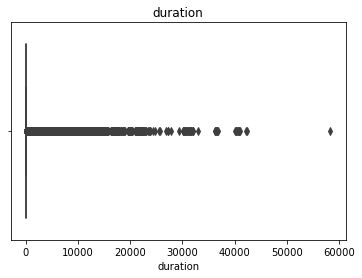

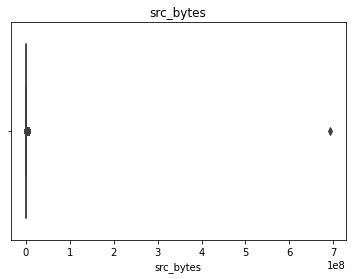

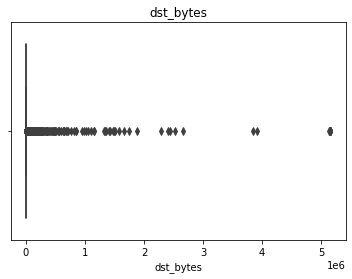

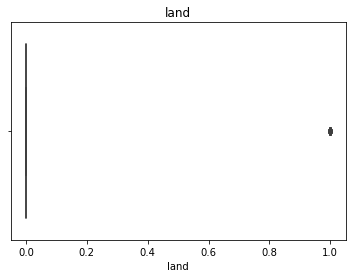

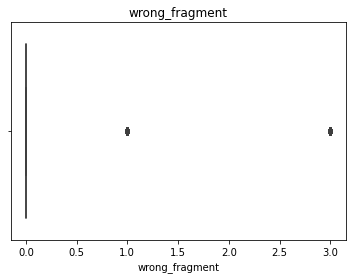

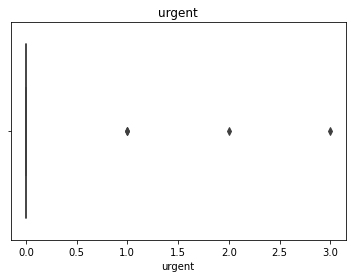

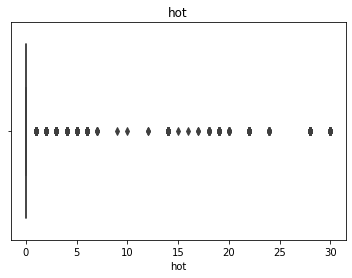

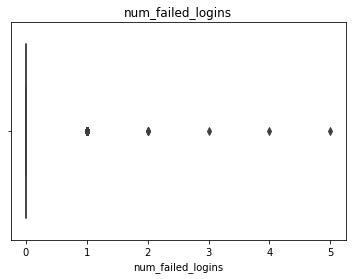

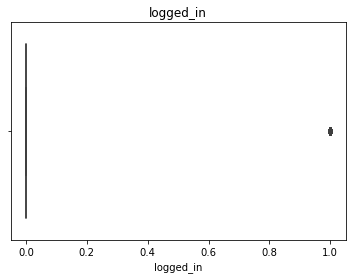

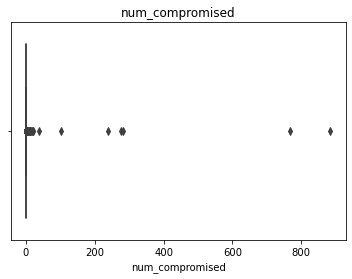

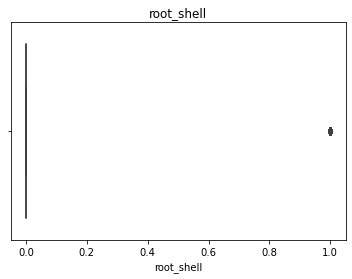

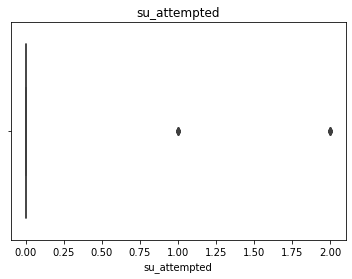

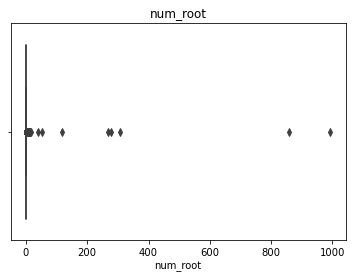

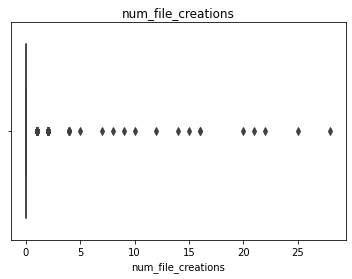

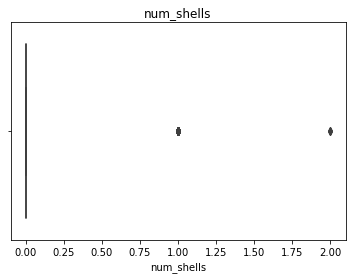

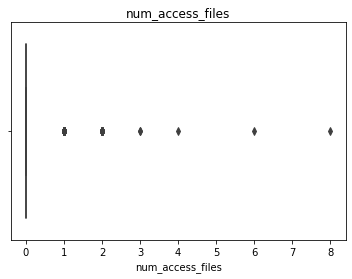

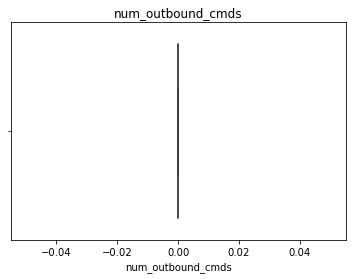

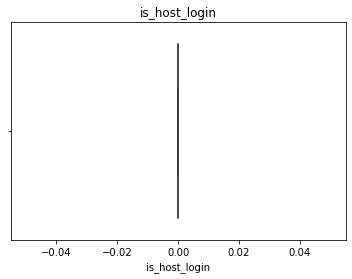

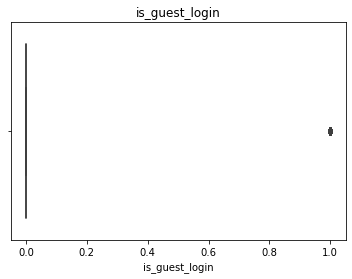

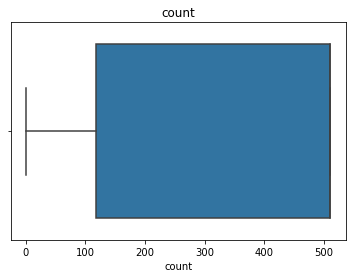

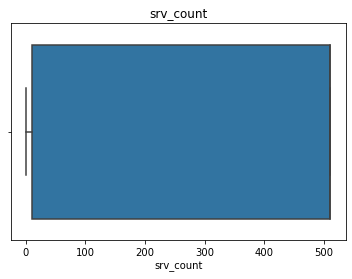

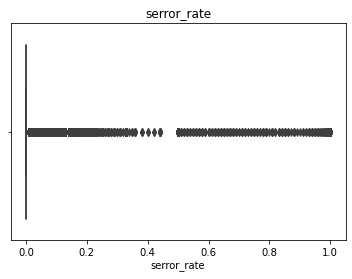

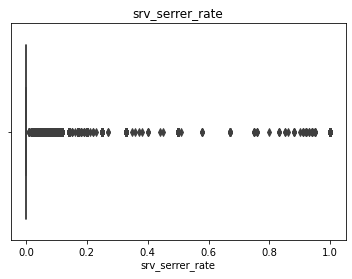

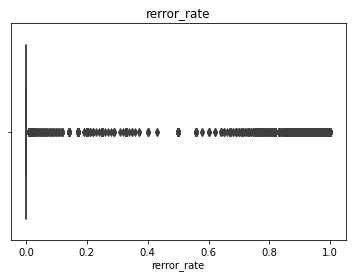

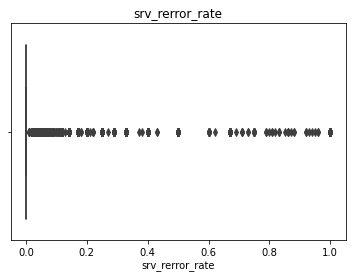

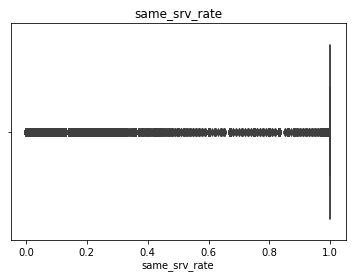

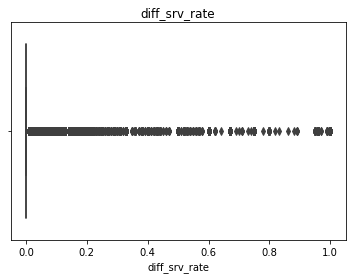

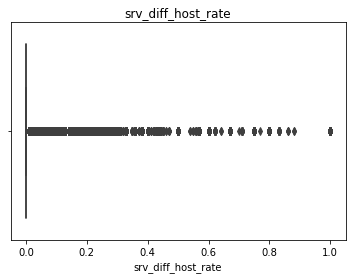

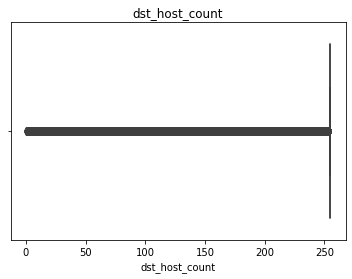

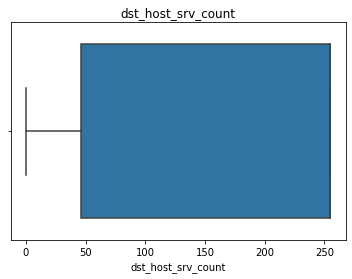

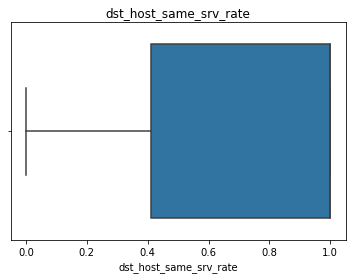

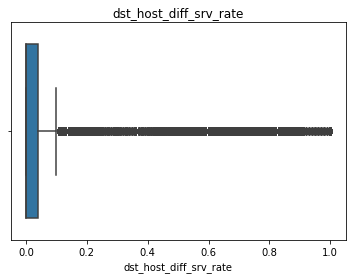

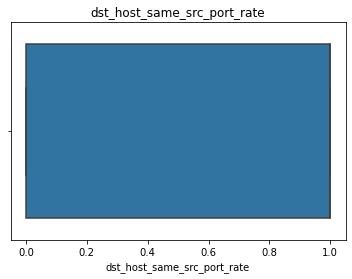

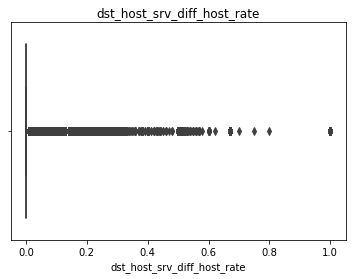

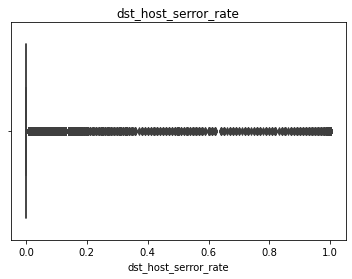

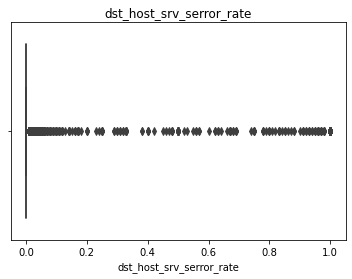

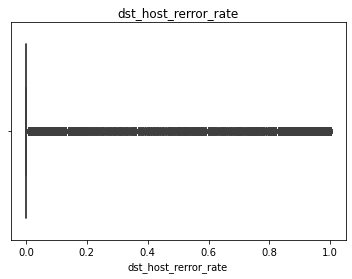

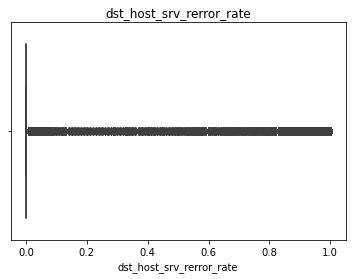

In [11]:
for x in numcols:
    sns.boxplot(data[x],orient='h')
    plt.title(x)
    plt.show()

In [12]:
for x in numcols:
    print(x)
    descr = data[x].describe()
    IQR = descr['75%'] - descr['25%']
    upper_limit =  descr['75%'] + 1.5 * IQR
    lower_limit =  descr['25%'] - 1.5 * IQR  
    #outlier replacement
    data[x][data[x]>upper_limit] = upper_limit
    data[x][data[x]<lower_limit] = lower_limit

duration
src_bytes
dst_bytes
land
wrong_fragment
urgent
hot
num_failed_logins
logged_in
num_compromised
root_shell
su_attempted
num_root
num_file_creations
num_shells
num_access_files
num_outbound_cmds
is_host_login
is_guest_login
count
srv_count
serror_rate
srv_serrer_rate
rerror_rate
srv_rerror_rate
same_srv_rate
diff_srv_rate
srv_diff_host_rate
dst_host_count
dst_host_srv_count
dst_host_same_srv_rate
dst_host_diff_srv_rate
dst_host_same_src_port_rate
dst_host_srv_diff_host_rate
dst_host_serror_rate
dst_host_srv_serror_rate
dst_host_rerror_rate
dst_host_srv_rerror_rate


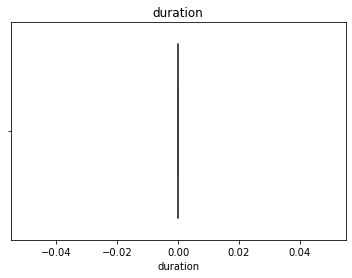

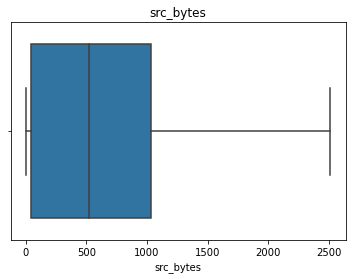

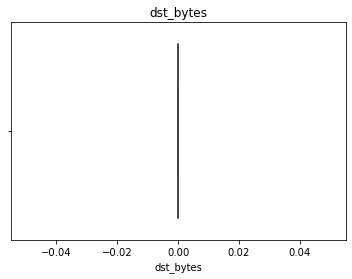

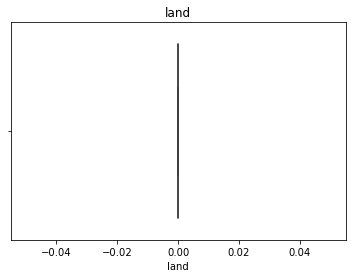

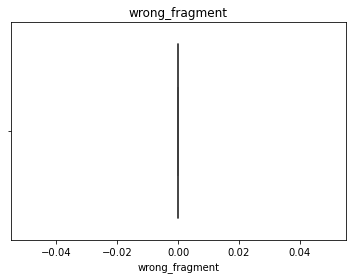

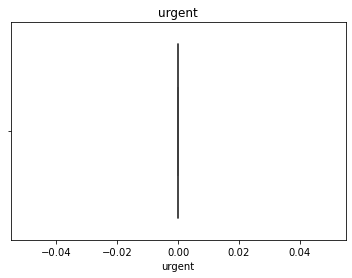

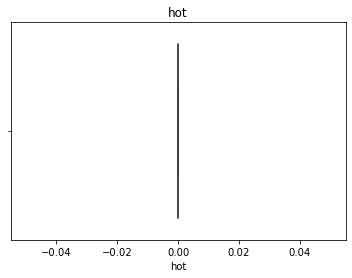

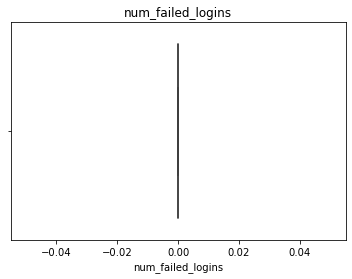

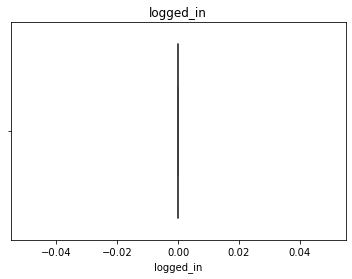

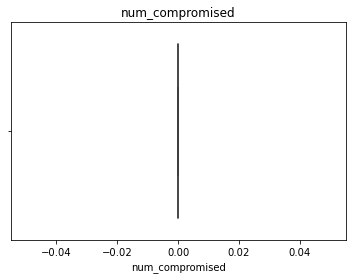

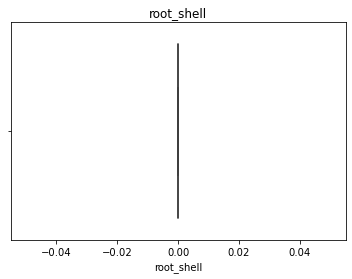

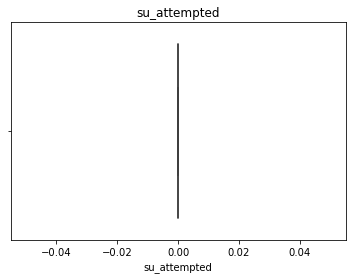

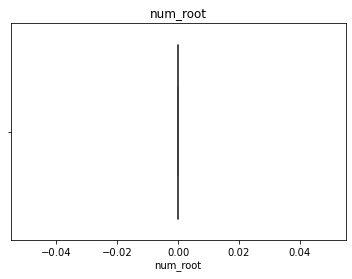

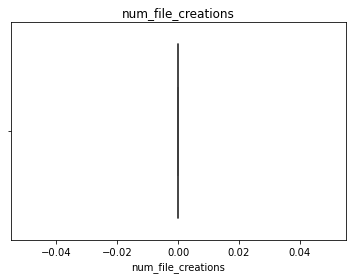

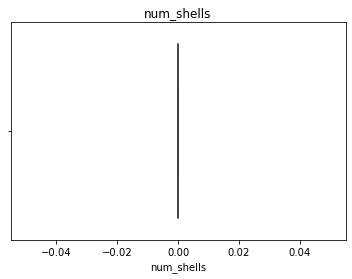

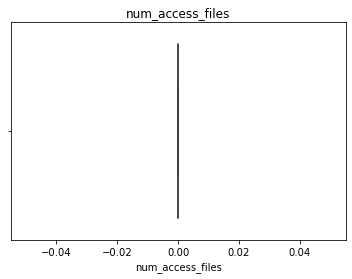

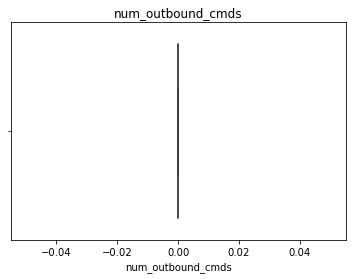

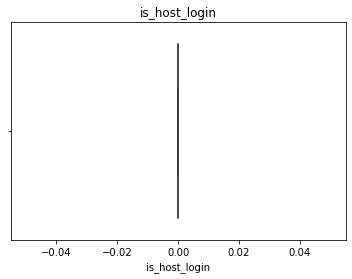

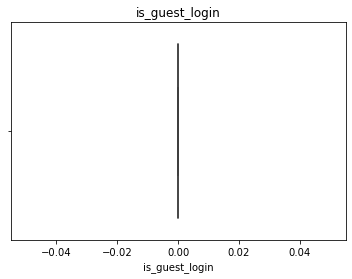

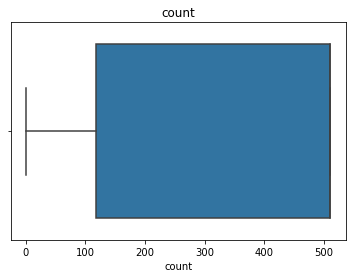

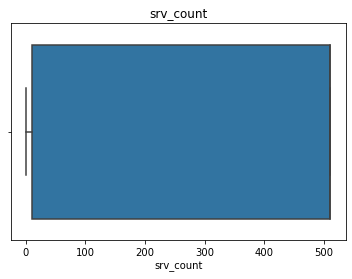

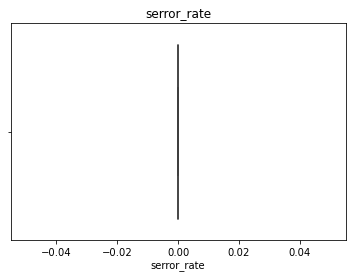

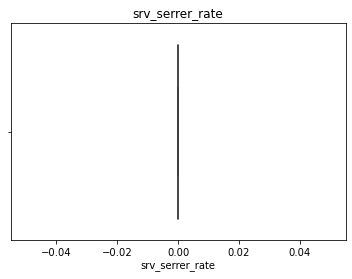

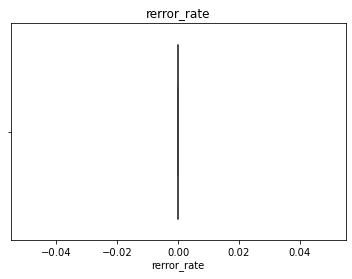

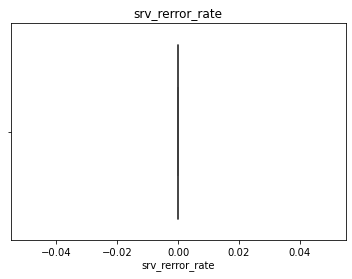

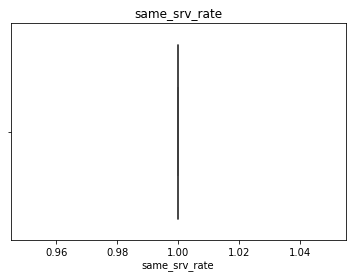

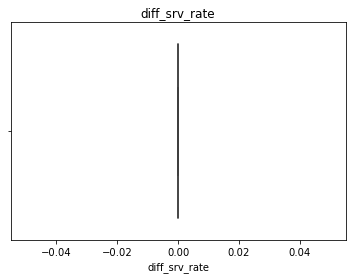

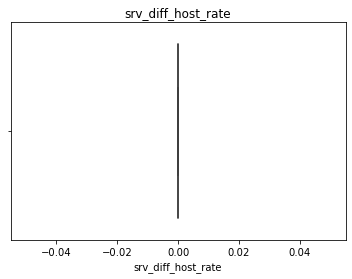

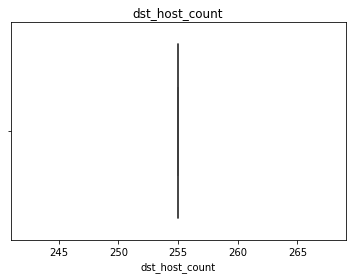

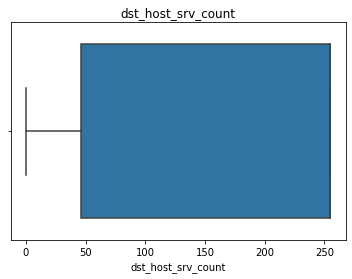

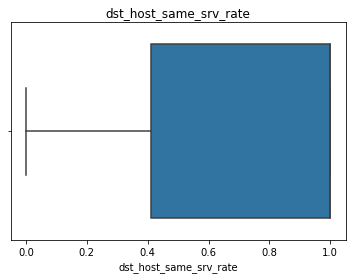

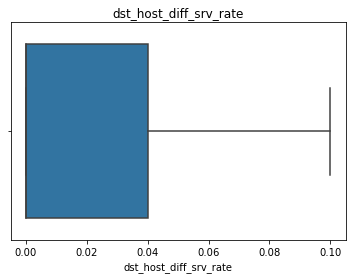

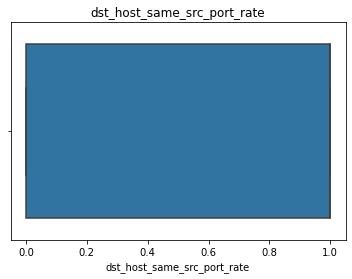

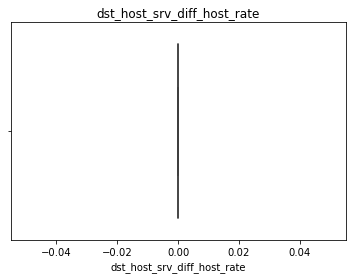

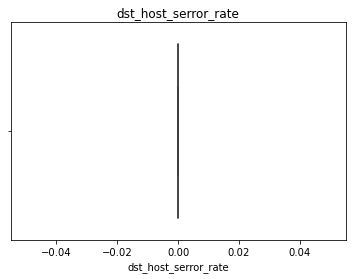

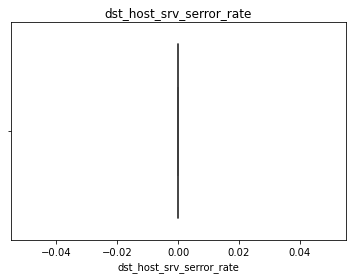

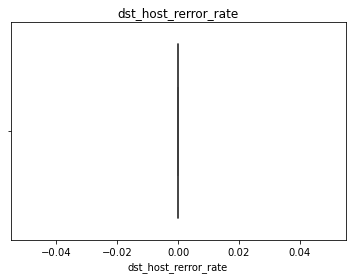

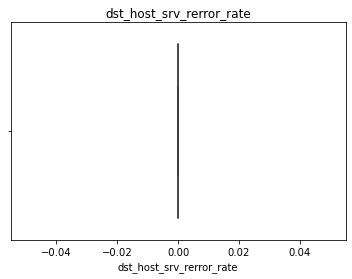

In [13]:
for x in numcols:
    sns.boxplot(data[x],orient='h')
    plt.title(x)
    plt.show()

In [14]:
data.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serrer_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'intrusion'],
      dtype='object')

In [15]:
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,intrusion
0,0,b'udp',b'domain_u',b'SF',44.0,0,0,0,0,0,...,89,0.64,0.01,0.01,0.0,0.0,0.0,0.0,0.0,b'normal.'
1,0,b'tcp',b'smtp',b'SF',1489.0,0,0,0,0,0,...,116,1.00,0.00,0.20,0.0,0.0,0.0,0.0,0.0,b'normal.'
2,0,b'icmp',b'ecr_i',b'SF',1032.0,0,0,0,0,0,...,255,1.00,0.00,1.00,0.0,0.0,0.0,0.0,0.0,b'smurf.'
3,0,b'icmp',b'ecr_i',b'SF',1032.0,0,0,0,0,0,...,255,1.00,0.00,1.00,0.0,0.0,0.0,0.0,0.0,b'smurf.'
4,0,b'tcp',b'private',b'S0',0.0,0,0,0,0,0,...,6,0.02,0.07,0.00,0.0,0.0,0.0,0.0,0.0,b'neptune.'


In [16]:
data['intrusion'].value_counts()

b'smurf.'              280790
b'neptune.'            107201
b'normal.'              97278
b'back.'                 2203
b'satan.'                1589
b'ipsweep.'              1247
b'portsweep.'            1040
b'warezclient.'          1020
b'teardrop.'              979
b'pod.'                   264
b'nmap.'                  231
b'guess_passwd.'           53
b'buffer_overflow.'        30
b'land.'                   21
b'warezmaster.'            20
b'imap.'                   12
b'rootkit.'                10
b'loadmodule.'              9
b'ftp_write.'               8
b'multihop.'                7
b'phf.'                     4
b'perl.'                    3
b'spy.'                     2
Name: intrusion, dtype: int64

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
y = data[['intrusion']]
X = data.drop('intrusion', axis = 1)

In [19]:
X.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,b'udp',b'domain_u',b'SF',44.0,0,0,0,0,0,...,255,89,0.64,0.01,0.01,0.0,0.0,0.0,0.0,0.0
1,0,b'tcp',b'smtp',b'SF',1489.0,0,0,0,0,0,...,255,116,1.00,0.00,0.20,0.0,0.0,0.0,0.0,0.0
2,0,b'icmp',b'ecr_i',b'SF',1032.0,0,0,0,0,0,...,255,255,1.00,0.00,1.00,0.0,0.0,0.0,0.0,0.0
3,0,b'icmp',b'ecr_i',b'SF',1032.0,0,0,0,0,0,...,255,255,1.00,0.00,1.00,0.0,0.0,0.0,0.0,0.0
4,0,b'tcp',b'private',b'S0',0.0,0,0,0,0,0,...,255,6,0.02,0.07,0.00,0.0,0.0,0.0,0.0,0.0


In [20]:
from sklearn.preprocessing import LabelEncoder
label_en=LabelEncoder()
X=X.apply(label_en.fit_transform)
X.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,2,11,9,38,0,0,0,0,0,...,0,89,64,1,1,0,0,0,0,0
1,0,1,50,9,1445,0,0,0,0,0,...,0,116,100,0,20,0,0,0,0,0
2,0,0,14,9,988,0,0,0,0,0,...,0,255,100,0,100,0,0,0,0,0
3,0,0,14,9,988,0,0,0,0,0,...,0,255,100,0,100,0,0,0,0,0
4,0,1,45,5,0,0,0,0,0,0,...,0,6,2,7,0,0,0,0,0,0


In [21]:
# Split test and train data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [22]:
X_train.shape

(395216, 41)

In [23]:

from sklearn.metrics import accuracy_score
  
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [24]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
y_prednb = nb.predict(X_test)
print("Naive Bayes Classifier report: \n\n", classification_report(y_test, y_prednb))

Naive Bayes Classifier report: 

                      precision    recall  f1-score   support

           b'back.'       1.00      0.99      1.00       442
b'buffer_overflow.'       0.02      0.33      0.04         9
      b'ftp_write.'       0.00      0.00      0.00         0
   b'guess_passwd.'       1.00      1.00      1.00         9
           b'imap.'       1.00      1.00      1.00         4
        b'ipsweep.'       0.41      0.93      0.57       250
           b'land.'       0.57      1.00      0.73         4
     b'loadmodule.'       0.01      0.50      0.02         2
       b'multihop.'       0.00      0.00      0.00         1
        b'neptune.'       0.99      1.00      0.99     21458
           b'nmap.'       0.00      0.02      0.00        41
         b'normal.'       0.99      0.87      0.92     19483
           b'perl.'       0.00      0.00      0.00         1
            b'phf.'       1.00      1.00      1.00         2
            b'pod.'       0.87      0.95      0.91

In [25]:
print('Accuracy is  :',accuracy_score(y_test,y_prednb))

Accuracy is  : 0.9674105561459441


In [26]:
from sklearn.naive_bayes import BernoulliNB
bnb= BernoulliNB()
bnb.fit(X_train,y_train)
y_pred=bnb.predict(X_test)

In [27]:
accuracy_score(y_test,y_pred)

0.9818227822478619

In [28]:
print("Bernoulli Classifier report: \n\n", classification_report(y_test, y_prednb))

Bernoulli Classifier report: 

                      precision    recall  f1-score   support

           b'back.'       1.00      0.99      1.00       442
b'buffer_overflow.'       0.02      0.33      0.04         9
      b'ftp_write.'       0.00      0.00      0.00         0
   b'guess_passwd.'       1.00      1.00      1.00         9
           b'imap.'       1.00      1.00      1.00         4
        b'ipsweep.'       0.41      0.93      0.57       250
           b'land.'       0.57      1.00      0.73         4
     b'loadmodule.'       0.01      0.50      0.02         2
       b'multihop.'       0.00      0.00      0.00         1
        b'neptune.'       0.99      1.00      0.99     21458
           b'nmap.'       0.00      0.02      0.00        41
         b'normal.'       0.99      0.87      0.92     19483
           b'perl.'       0.00      0.00      0.00         1
            b'phf.'       1.00      1.00      1.00         2
            b'pod.'       0.87      0.95      0.91  

By using Bernoulli method we get 98% accuracy